In [1]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
from skimage import data, exposure, img_as_float ,io,color
import scipy
from scipy import ndimage
import os
from time import time
import tensorflow as tf
%matplotlib inline

In [2]:
img=Image.open('/Users/wasifaahmed/Documents/FRAS/image/img1.1.png')

In [3]:
w,h = img.size
pointsarray=[]
print(w,h)
t0=time()
predictedMatrix=predictAsMatrix(img,w,h)


2000 2000


NameError: name 'predictAsMatrix' is not defined

In [111]:
print('Next Step: K -------------')
g= Graph(80, 80, predictedMatrix)
print("Number of islands is :")
N=g.countIslands()
print(N)
print('Next Step: point array -----')

points(predictedMatrix,h=80,w=80)
print(pointsarray)

Next Step: K -------------
Number of islands is :
11
Next Step: point array -----
[[6, 60], [7, 60], [8, 53], [9, 24], [10, 66], [10, 67], [11, 66], [11, 67], [20, 73], [37, 0], [37, 1], [38, 50], [41, 32], [42, 32], [49, 32], [50, 32], [50, 71], [77, 43]]


[[ 41.5  32. ]
 [ 10.5  66.5]
 [ 37.    0.5]
 [ 50.   71. ]
 [ 77.   43. ]
 [  9.   24. ]
 [ 38.   50. ]
 [  8.   53. ]
 [ 49.5  32. ]
 [  6.5  60. ]
 [ 20.   73. ]]
[[ 1049.5   812. ]
 [  274.5  1674.5]
 [  937.     24.5]
 [ 1262.   1787. ]
 [ 1937.   1087. ]
 [  237.    612. ]
 [  962.   1262. ]
 [  212.   1337. ]
 [ 1249.5   812. ]
 [  174.5  1512. ]
 [  512.   1837. ]]


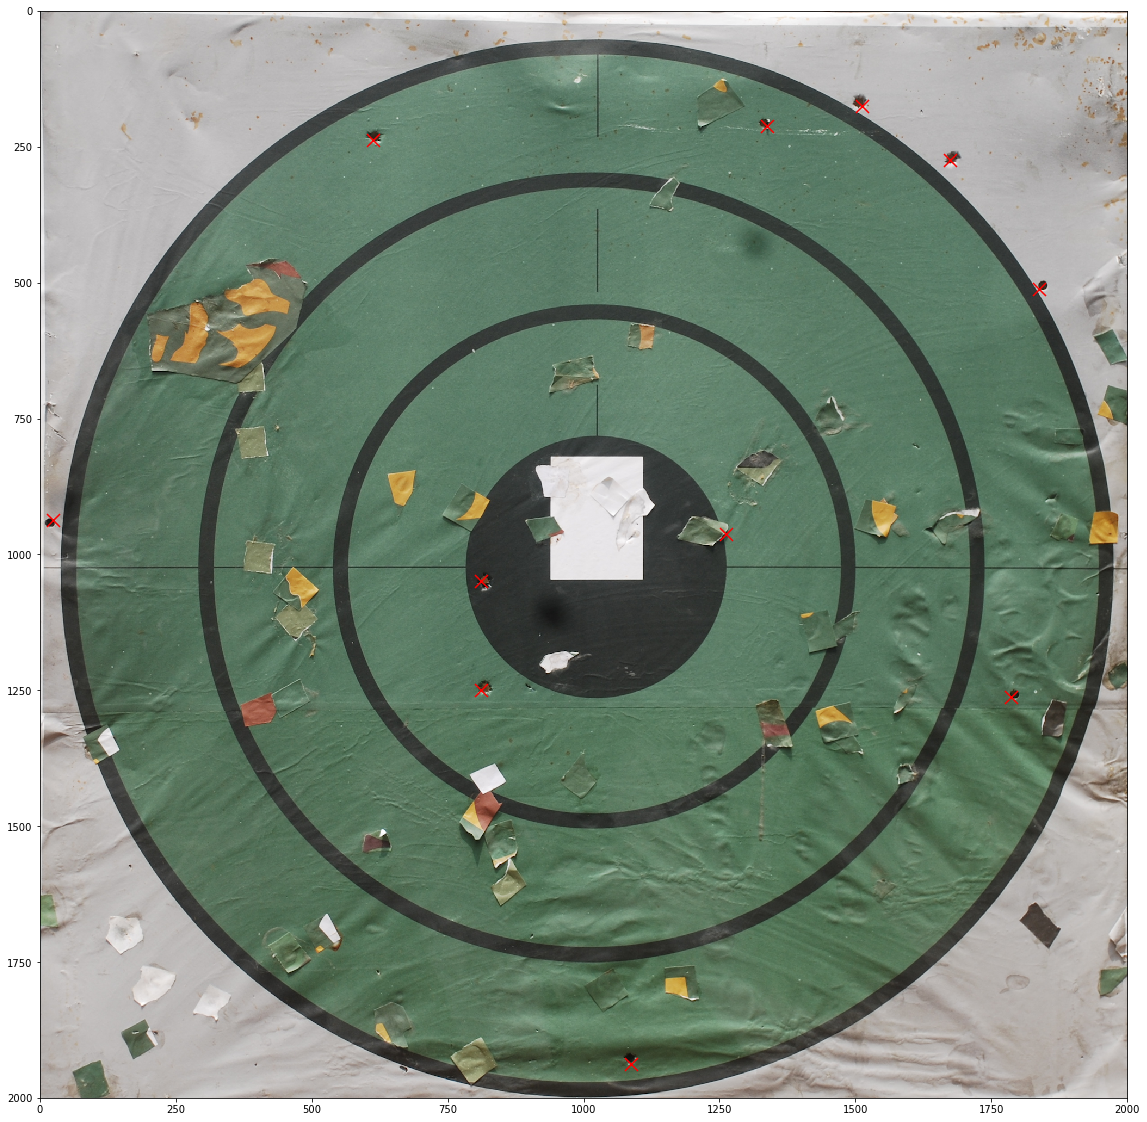

In [114]:
kmean(N,pointsarray,img)

### Cropping Images

In [4]:
def predictAsMatrix(image,width,height):
    step=25
    i=0
    resized_array =np.zeros(shape=(width//25,height//25))
    while i<=height-25:
        j=0
        z=0
        while j<=height-25:
            patch = img.crop((i, j, i+25, j+25))
            img1=np.array(patch)
            image_data=color.rgb2gray(img1)
            img_data=merge_datasets(image_data)
            test_data = reformat(img_data)
            patchp=patchIdentification(test_data)
            patch.save('/Users/wasifaahmed/Documents/FRAS/image/test2/'+ "_"+str(patchp)+"_"+str(j)+"_"+str(i) + '.png')
            resized_array[j//25][i//25]=patchp
            j=j+step
            z=z+1
        i=i+step
    delt=(time() - t0)
    minutes, seconds =  delt// 60, delt % 60
    print("Prediction Time TT minutes , seconds: ", minutes,seconds)
    return resized_array

In [5]:
def merge_datasets(img1):
    predict_dataset = make_arrays(1, 25, 25)
    predict_dataset[0:1, :, :] = img1
    return predict_dataset

In [6]:
def make_arrays(nb_rows, image_height, image_width):
    if nb_rows:
        dataset = np.ndarray((nb_rows, image_height, image_width), dtype=np.float32)
    else:
        dataset = None
    return dataset

In [7]:
def reformat(dataset):
    dataset = dataset.reshape((-1, 25*25)).astype(np.float32)
    return dataset

### Prediction

In [10]:
graph = tf.Graph()
with graph.as_default():
    sess = tf.Session(graph=graph)
    saver = tf.train.import_meta_graph('/Users/wasifaahmed/Documents/FRAS/Simulation/FRAS_20170725.ckpt.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    
    def patchIdentification(data):
        w1 = graph.get_tensor_by_name("tf_test_image:0")
        feed_dict ={w1:data}
        op_to_restore = graph.get_tensor_by_name("test_prediction_image:0")
        predict= sess.run([op_to_restore],feed_dict=feed_dict)
        array=predict[0][0]
        if(array[0]>array[1]):
            return 0
        else :
            return 1

ERROR:tensorflow:Couldn't match files for checkpoint /Users/wasifaahmed/Documents/FRAS/Simulation/FRAS_20170726.ckpt
INFO:tensorflow:Restoring parameters from None


SystemError: <built-in function TF_Run> returned a result with an error set

### TO FIND K

In [11]:
# Program to count islands in boolean 2D matrix
class Graph:
 
    def __init__(self, row, col, g):
        self.ROW = row
        self.COL = col
        self.graph = g
        
    def isSafe(self, i, j, visited):
        return (i >= 0 and i < self.ROW and
                j >= 0 and j < self.COL and
                not visited[i][j] and self.graph[i][j])
             

    def DFS(self, i, j, visited):

        rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1];
        colNbr = [-1,  0,  1, -1, 1, -1, 0, 1];
        visited[i][j] = True
        
        for k in range(8):
            if self.isSafe(i + rowNbr[k], j + colNbr[k], visited):
                self.DFS(i + rowNbr[k], j + colNbr[k], visited)
 
 
    def countIslands(self):
        visited = [[False for j in range(self.COL)]for i in range(self.ROW)]
        count = 0
        for i in range(self.ROW):
            for j in range(self.COL):
                if visited[i][j] == False and self.graph[i][j] ==1:
                    self.DFS(i, j, visited)
                    count += 1
 
        return count

### Points

In [18]:
def points(data,h,w):
    i=0
    while (i<h):
        j=0
        while (j<w):
            if(data[i][j]==1):
                pointsarray.append([i,j])
                
            j=j+1
        i=i+1

### Clustering ( To Find The Center)

In [113]:
def kmean(N,pointsarray,img):
    n=0
    while (n<=100):
        kmeans = KMeans(n_clusters=N, random_state=0).fit(pointsarray)
        centers=kmeans.cluster_centers_
        centroids=((kmeans.cluster_centers_)*25)+12
        n=n+1
    print(centers)
    print(centroids)
    print(centroids[:, 1])
    plt.figure(figsize=(20,20))
    plt.scatter(centroids[:, 1],centroids[:, 0],marker='x', s=169 ,color='r')
    plt.imshow(img)
    plt.show()